In [1]:
import dLux
import poppy
import jax

In [2]:
from jax.config import config

In [3]:
config.update("jax_enable_x64", True)
config.update("jax_debug_nans", True)

In [4]:
from layers import *
from matplotlib import pyplot

In [33]:
hexagonal_basis = HexagonalBasis(
    nterms=9, 
    npix=256,
    rmax=1., 
    theta=0., 
    phi=0., 
    x=0., 
    y=0.)

In [34]:
coordinates = get_pixel_positions(512) * 2 / 512

In [35]:
zernikes = hexagonal_basis._zernikes(coordinates)

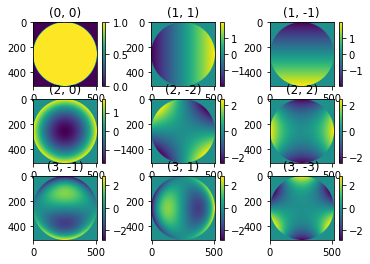

In [37]:
for i in range(9):
    n, m = hexagonal_basis._noll_index(np.array([i + 1]))
    pyplot.subplot(3, 3, i + 1)
    pyplot.title(f"{int(n), int(m)}")
    pyplot.imshow(zernikes[i])
    pyplot.colorbar()

In [38]:
p_zernikes = poppy.zernike.zernike_basis(9, 512, outside=0.)

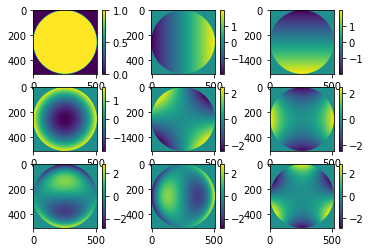

In [39]:
for i in range(9):
    pyplot.subplot(3, 3, i + 1)
    pyplot.imshow(p_zernikes[i])
    pyplot.colorbar()

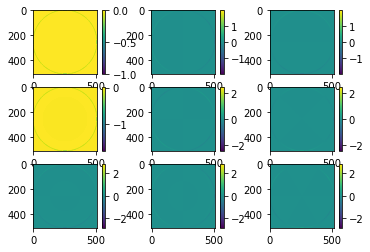

In [40]:
for i in range(9):
    pyplot.subplot(3, 3, i + 1)
    pyplot.imshow(p_zernikes[i] - zernikes[i])
    pyplot.colorbar()

In [15]:
aperture = hexagonal_basis._aperture(coordinates)

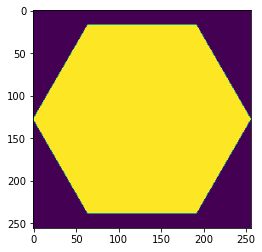

In [16]:
pyplot.imshow(aperture)

In [17]:
hexagonal_basis.theta = np.pi / 2

FrozenInstanceError: cannot assign to field 'theta'

In [ ]:
# So I need setters and getters as well as to try the MAX_DIFF constant implementation. 